#### Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Data collection and analysis 

In [2]:
insurance_dataset = pd.read_csv("E:\Datasets\insurance.csv")
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_dataset.shape

(1338, 7)

In [4]:
#getting information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Categorical Features: Sex, Smoker, Region


In [5]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#Analysis
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 432x432 with 0 Axes>

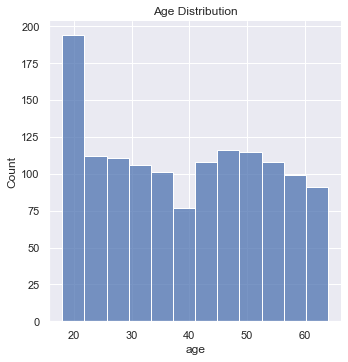

In [7]:
#Age distribution
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset["age"])
plt.title("Age Distribution")
plt.show()

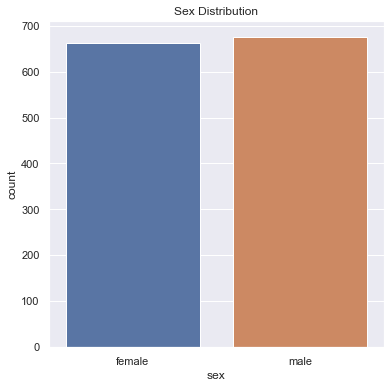

In [8]:
#sex distribution
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=insurance_dataset)
plt.title("Sex Distribution")
plt.show()

In [9]:
insurance_dataset["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 432x432 with 0 Axes>

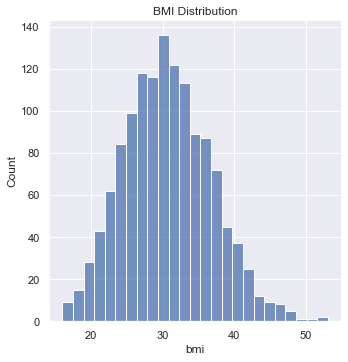

In [10]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset["bmi"])
plt.title("BMI Distribution")
plt.show()

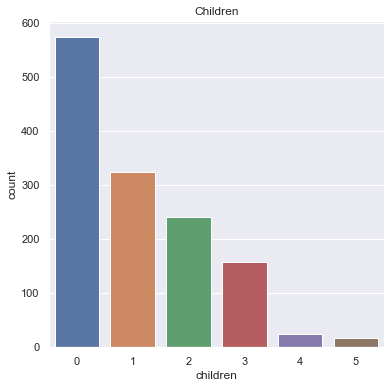

In [11]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x="children",data=insurance_dataset)
plt.title("Children")
plt.show()

In [12]:
insurance_dataset["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

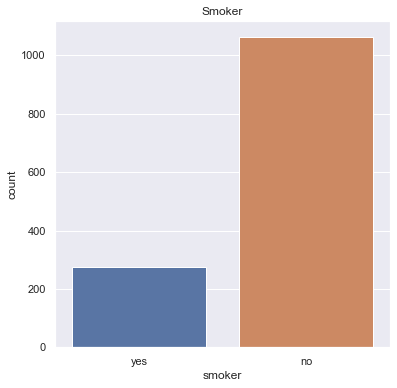

In [13]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x="smoker", data=insurance_dataset)
plt.title("Smoker")
plt.show()

In [14]:
insurance_dataset["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

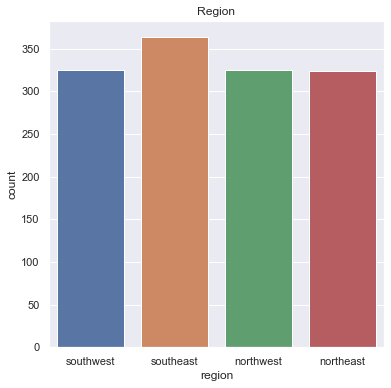

In [15]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x="region", data=insurance_dataset)
plt.title("Region")
plt.show()

In [16]:
insurance_dataset["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 432x432 with 0 Axes>

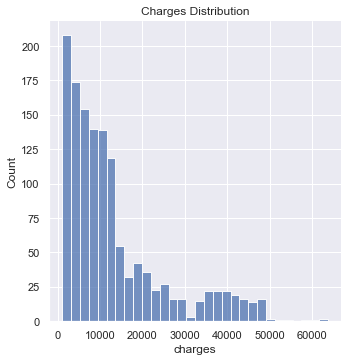

In [17]:
#distribution of charges
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset["charges"])
plt.title("Charges Distribution")
plt.show()

#### Data Pre-Preprocessing

In [18]:
#encoding the categorical features

#encoding sex column
insurance_dataset.replace({"sex":{"male":0,"female":1}},inplace=True)

#encoding smoker column
insurance_dataset.replace({"smoker":{"yes":0,"no":1}},inplace=True)

#encoding region column
insurance_dataset.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}},inplace=True)


In [20]:
#data after encoding

insurance_dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
5,31,1,25.740,0,1,0,3756.62160
6,46,1,33.440,1,1,0,8240.58960
7,37,1,27.740,3,1,3,7281.50560
8,37,0,29.830,2,1,2,6406.41070
9,60,1,25.840,0,1,3,28923.13692


In [21]:
#splitting the features and the target

X = insurance_dataset.drop(columns="charges",axis=1)
Y = insurance_dataset["charges"]


In [22]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [23]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


#### Splitting the data into Training data & Testing data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


#### Model Training

In [27]:
regressor = LinearRegression()

In [28]:
regressor.fit(X_train, Y_train)

LinearRegression()

#### Model Evaluation

In [31]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [32]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R squared value:", r2_train)

R squared value: 0.751505643411174


In [33]:
#prediction on test data
training_data_prediction = regressor.predict(X_test)

In [34]:
# R squared value
r2_test = metrics.r2_score(Y_test, training_data_prediction)
print("R squared value:", r2_test)

R squared value: 0.7447273869684077


#### Building a Predictive System

In [44]:
input_data = (31,1,25.74,0,1,1)

#changing input data to numpy array
input_data_as_numpy_array = np.array(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print("The insurance cost in USD is:", prediction[0])

The insurance cost in USD is: 3972.3030037793833


C:\Users\munee\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [42]:
regressor.predict([[31,1,25.74,0,1,1]])

C:\Users\munee\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3972.30300378])